In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PyCO2SYS as pyco2

In [3]:
df = pd.read_csv("../compilation/data/in_situ_rates_compiled_allvar.csv")

## How well does CANYON-B reproduce the WOA nutrient data?

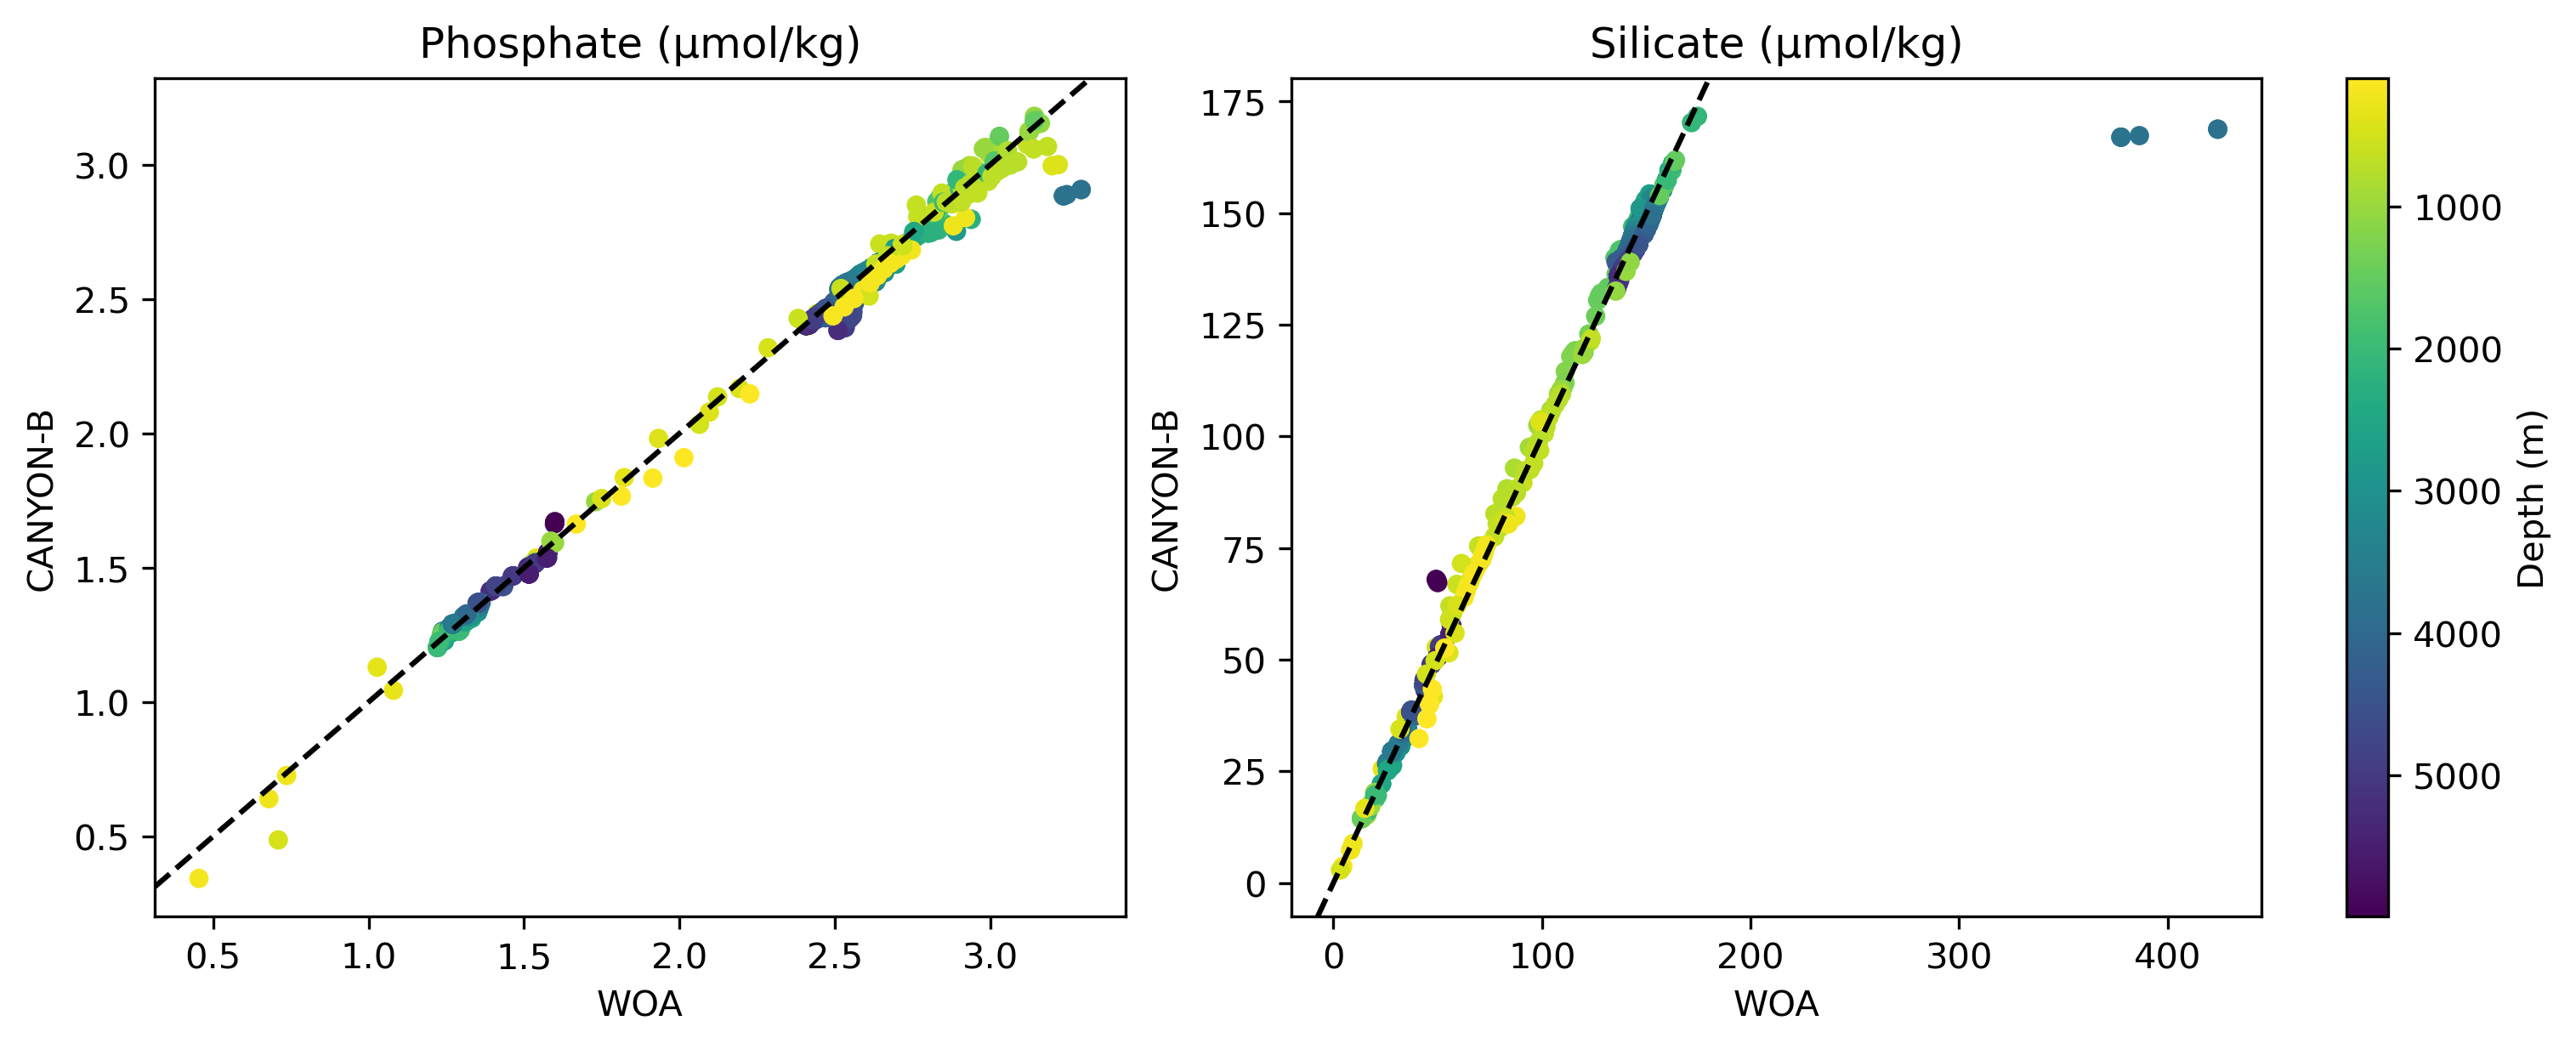

In [39]:
fig, axs = plt.subplots(1,2, dpi=300, figsize =(10,4), layout='compressed')

for a in axs:
    a.axline((1,1), slope=1, color='black', linestyle='--')
    a.set_xlabel('WOA')
    a.set_ylabel('CANYON-B')

axs[0].scatter(df['PO4_woa'], df['PO4_cb'], c=df['Depth'], cmap='viridis_r', s=20)
cb = axs[1].scatter(df['SiOH4_woa'], df['SiOH4_cb'], c=df['Depth'], cmap='viridis_r', s=20)

cbar = fig.colorbar(cb, ax=axs, label='Depth (m)', pad=0.04) 
cbar.ax.invert_yaxis()
#plt.axline((1,1), slope=1, color='black', linestyle='--')
#plt.xlim(0.4,1.4)
#plt.ylim(0.4,1.4)

axs[0].set_title('Phosphate (µmol/kg)')
axs[1].set_title('Silicate (µmol/kg)')

plt.show()

## Does it make a difference for predicted $\Omega$ ?

In [15]:
result_woa = pyco2.sys(par1=df["DIC_cb"], par2=df["pH_insitu_cb"], par1_type = 2, par2_type=3, 
                   salinity=df["Sal_woa"], temperature=df["Temp_woa"], pressure=df["Pressure"],
                   total_silicate=df["SiOH4_woa"], total_phosphate=df["PO4_woa"])

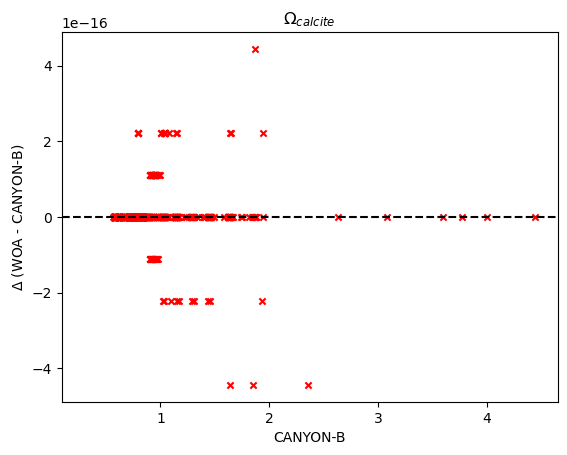

In [41]:
plt.scatter(df['Oca_calc23'], result_woa['saturation_calcite']-df['Oca_calc23'], s=20, color='red', marker='x')

plt.axline((0.3,0), slope=0, color='black', linestyle='--')
plt.xlabel('CANYON-B')
plt.ylabel('$\Delta$ (WOA - CANYON-B)')
plt.title('$\Omega_{calcite}$')
plt.show()